In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

In [2]:
previous = pd.read_csv("employee_attrition_previous_closure.csv")
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [3]:
#drop missing value
df = previous.dropna() 
df.head(5).T

,0,1,2,4,5
Age,50.0,36.0,21.0,52.0,33.0
Attrition,No,No,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,1126.0,216.0,337.0,994.0,1277.0
Department,Research & Development,Research & Development,Sales,Research & Development,Research & Development
DistanceFromHome,1.0,6.0,7.0,7.0,15.0
Education,2,2,1,4,1
EducationField,Medical,Medical,Marketing,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,997,178,1780,1118,582


In [4]:
# drop non-sense columns
df = df.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'])

# Exploratory Data Analysis

From the below scatter plots, it could be found that the attrited people tend to concentrate on the lower salary level.

<AxesSubplot:xlabel='MonthlyRate', ylabel='MonthlyIncome'>

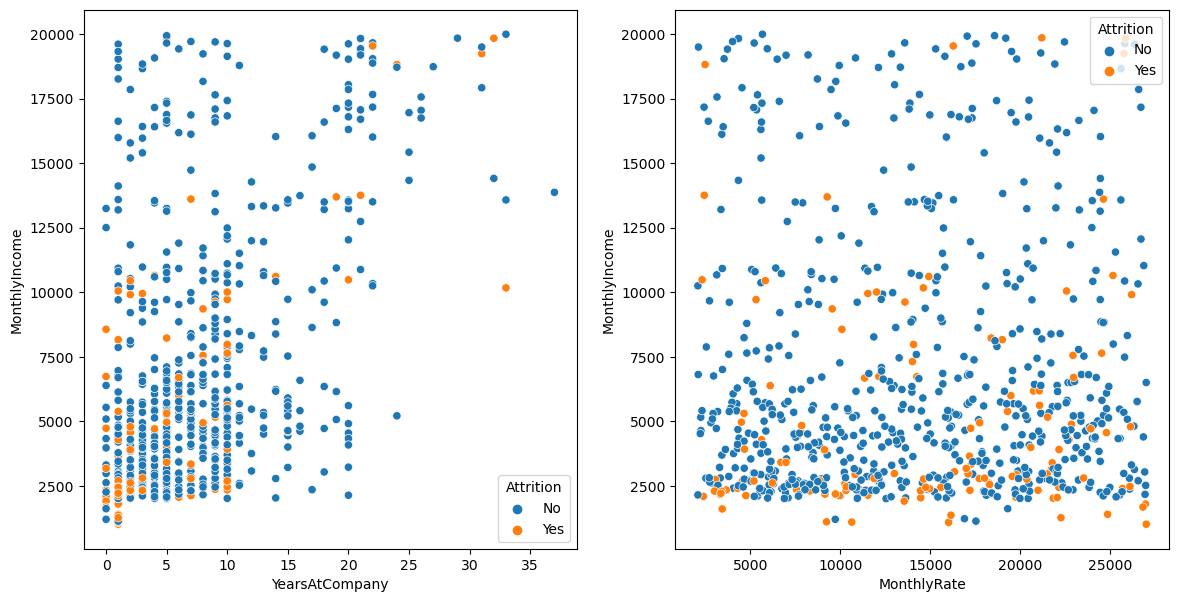

In [55]:
# Start from the monthly salary 
fig, axs = plt.subplots(ncols=2,figsize=(14, 7))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome',hue="Attrition", data=df, ax=axs[0])
sns.scatterplot(x='MonthlyRate', y='MonthlyIncome',hue="Attrition",data=df, ax=axs[1])


To further explore the factors that might be relevant with the salary, the salary level is positive related with the total working years (compared with working years at company) and job level.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

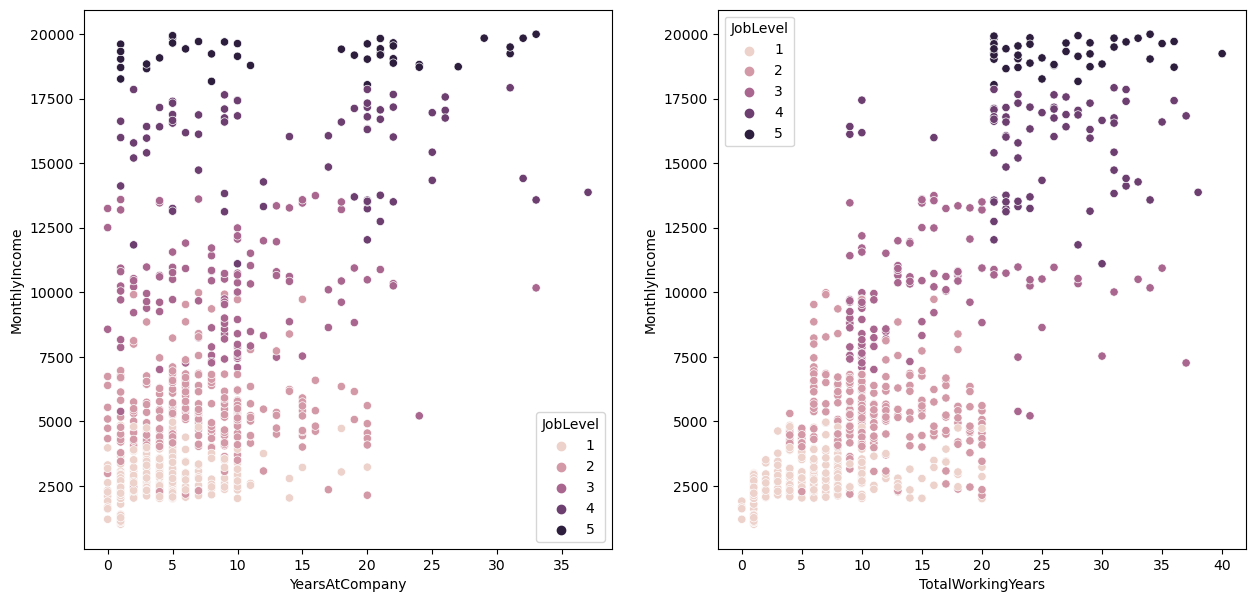

In [183]:
# Further explore any facors that related to the monthly salary
fig, axs = plt.subplots(ncols=2,figsize=(15, 7))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome',hue="JobLevel", data=df, ax=axs[0])
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome',hue="JobLevel",data=df, ax=axs[1])

The left-hand side box plot shows the effect of the stock option on the attrition. For the people who are not granted and less granted (i.e.StockOptionLevel =0,1) options, the attrition group tend to have a lower level salary. However, this has been inversed for the more granted groups (i.e.StockOptionLevel =2,3). In other words, although people who are granted options have a lower range of salary level, they are still willing to stay at the company rather than attrition.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

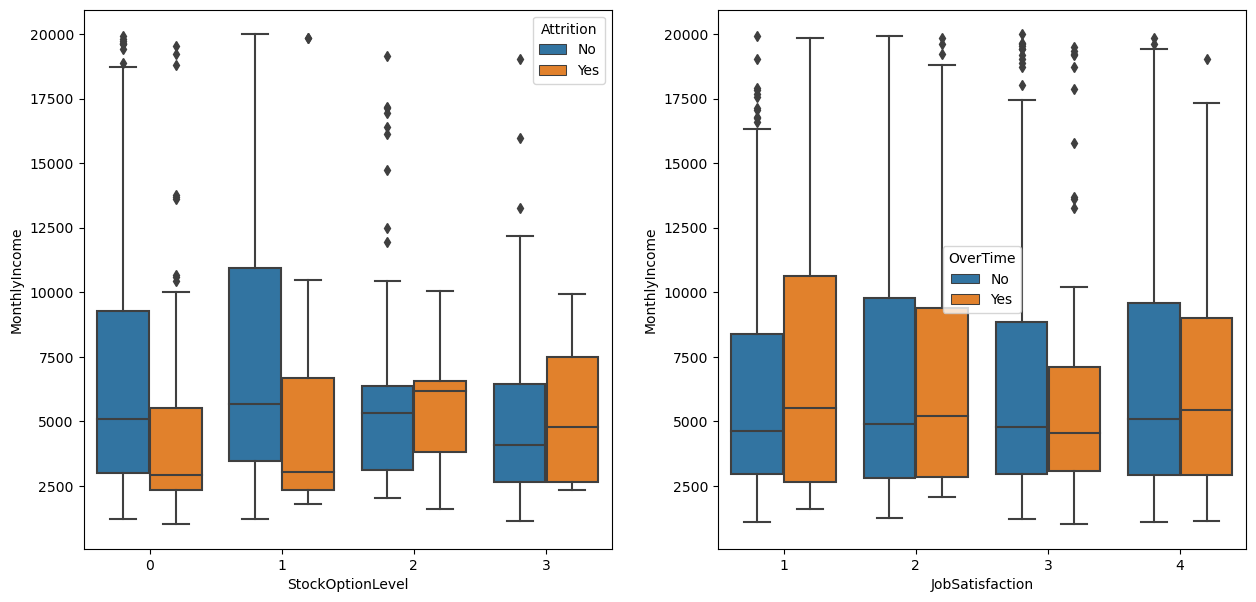

In [84]:
# Boxplots
fig, axs = plt.subplots(ncols=2,figsize=(15, 7))
sns.boxplot(x='StockOptionLevel',y='MonthlyIncome',hue='Attrition', data=df, ax=axs[0])
sns.boxplot(x='JobSatisfaction',y='MonthlyIncome',hue='OverTime', data=df, ax=axs[1])

The set of the hisogram explore the self-reporting related factors. From the hisogram plots, the rating of jobinvolvement and worklifebalance volatile more than other two. They might be the important consideration when employees make decision of attrition.

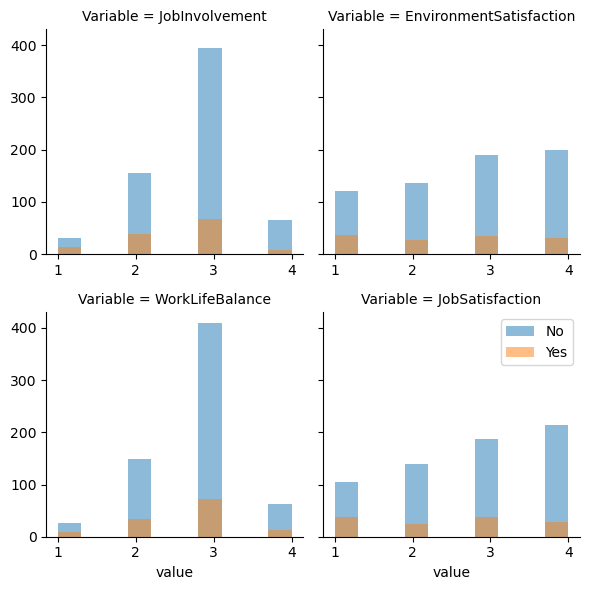

In [86]:
# Plot Hisogram plots for 
hist = pd.melt(df, "Attrition", value_vars=['JobInvolvement','EnvironmentSatisfaction','WorkLifeBalance','JobSatisfaction'],var_name="Variable")
g = sns.FacetGrid(hist, hue="Attrition", col="Variable", col_wrap=2, sharex=False)
g.map(plt.hist, "value", alpha=.5)
plt.legend(loc='upper right')

The role of the sales representive, sales executive, laboratory techniciant and research scientist take the high proportion of atrrition. Also, the single person tend to have more probalitity to leave the company compared with ither two groups.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

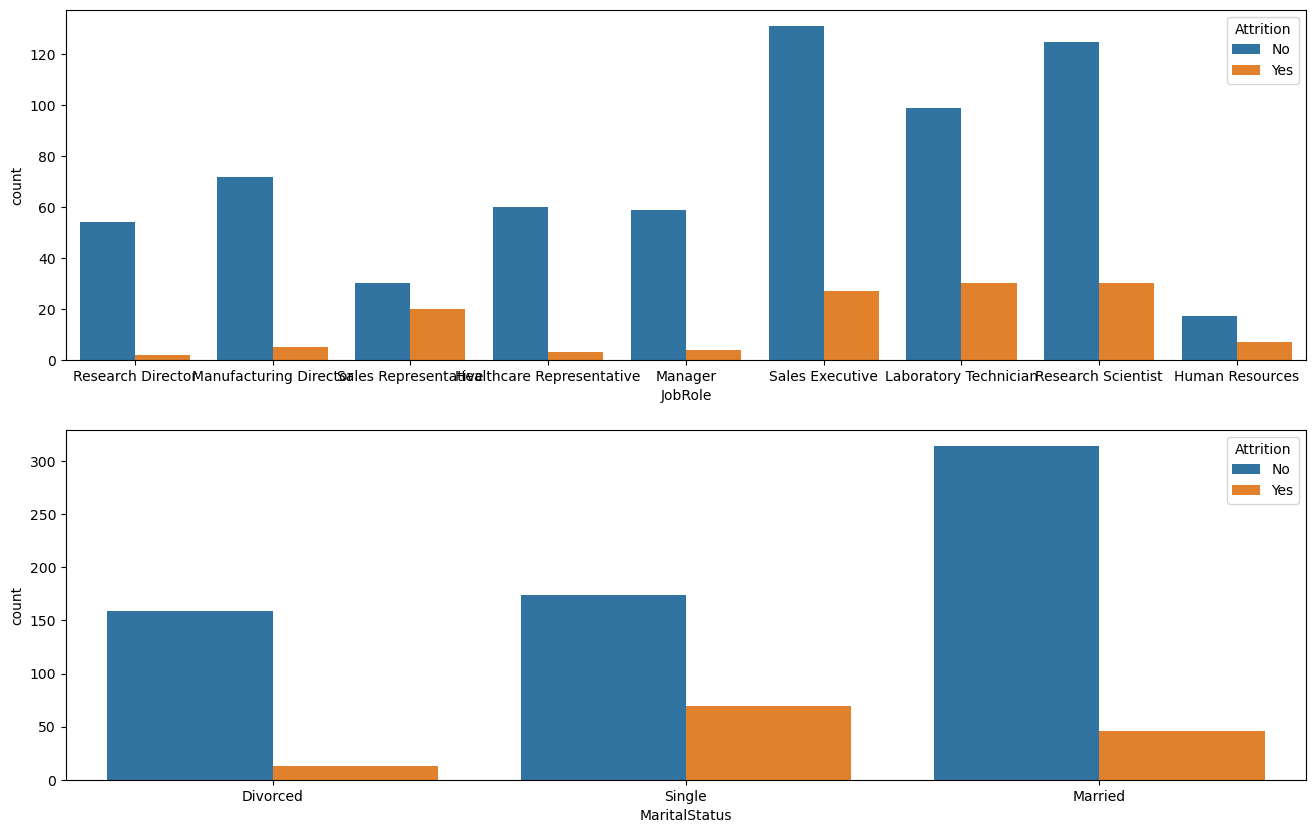

In [104]:
#percentage
fig, axs = plt.subplots(nrows=2,figsize=(16, 10))
sns.countplot(x='JobRole',hue='Attrition',data=df,ax=axs[0])
sns.countplot(x='MaritalStatus',hue='Attrition',data=df,ax=axs[1])


# Prediction Model

## Logistic Model

In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [105]:
# Transfer Category variables to dummy variables
cata_result = pd.DataFrame()
for i in df.columns:
    if df[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(df[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)
#Delete the original Category variables      
for i in df.columns:
    if df[i].dtype == 'O':
        df = df.drop(i,axis=1)

#Merge data together
df = pd.concat([df,cata_result],axis=1)

In [111]:
df.rename(columns={'Attrition_Yes':'Attrition'},inplace=True)
df.rename(columns={'OverTime_Yes':'OverTime'},inplace=True)

In [116]:
df.drop(columns=['OverTime_No','Attrition_No'],inplace=True)

In [117]:
Y = df[['Attrition']] #creating the dependent variable
X = df.drop(columns=['Attrition']) 

In [186]:
#Spllit data to different sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.4,random_state = 2000)
#testX, validationX, testY, validationY = train_test_split(otherX, otherY, test_size=0.5,random_state = 9668)
                                                  

In [187]:
# Fit a logistic regression 
logm = LogisticRegression(max_iter=2000,C=0.1,
                          solver='liblinear')#set the c=0.1 to regularize the data, and set the solver as 'liblinear'to fit this small dataset 
logm.fit(trainX, trainY.values.ravel()) 
print(logm.intercept_) #print the coefficient of the lr
print(logm.coef_)

[0.05154266]
[[-3.51631008e-02 -8.93731834e-05  2.81649959e-02  6.42917994e-02
  -2.27612858e-01  6.66847905e-03 -2.78439520e-01 -1.18884084e-03
  -9.43772788e-02 -7.45291900e-05  2.06151961e-05  1.24782183e-01
   1.37855935e-02  1.61227574e-01 -8.63782598e-04 -8.28890172e-02
  -5.18414062e-02 -8.63284692e-03 -2.23177481e-02  4.58027330e-02
  -1.81858196e-01  1.01967370e-01  4.15746138e-03 -1.69724605e-01
   2.74723997e-01 -5.34567333e-02  5.45527742e-02 -2.23242956e-01
   2.20232841e-01  1.06449392e-01 -1.68841154e-01  1.70771379e-01
  -4.50887976e-02  4.54720636e-03 -1.62953676e-02 -6.31073230e-02
   1.14649982e-01 -1.30754678e-01  5.72335619e-02  4.29840537e-02
   1.24090891e-02 -2.29587584e-02 -8.08221301e-02 -4.10557306e-03
   6.87339951e-02  1.08823099e-01 -9.27912783e-02 -2.10564227e-01
   3.54898164e-01  6.84696592e-01]]


In [194]:
#print the auc value
metrics.roc_auc_score(testY, lr_Y_probs)

0.7992307692307692

In [195]:
## Choose a fitted thershold in lr and calculate the confusion matrix value
J = lr_tpr - lr_fpr
threshold = thresholds[np.argmax(J)]
lr_y_pred = np.where(lr_Y_probs < threshold, 0, 1)
metrics.confusion_matrix(testY, lr_y_pred)

array([[222,  38],
       [ 15,  35]])

In [197]:
#Apply 10-Fold Cross Validation for Logistic Regression
from sklearn import model_selection

# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10)

# Define the Logistic Regression Model
lrCV = LogisticRegression(max_iter=2000,C=0.1,solver='liblinear')

# Define the evaluation metric 
scoring = 'roc_auc'

# Train the Logistic Regression Model on the 10-Fold Cross Validation
lr_results = model_selection.cross_val_score(lrCV, trainX, trainY.values.ravel(), 
                                             cv=kfold, scoring=scoring)
lr_auc = lr_results.mean()
print("The Logistic Regression AUC: %.3f and the STD is (%.3f)" % (lr_auc, lr_results.std()))

The Logistic Regression AUC: 0.749 and the STD is (0.107)


## Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier
import graphviz as gp
from sklearn.tree import export_graphviz

In [199]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 10, #set the parameters
                                       max_depth=3,random_state=0 )
classifier_DT.fit(trainX, trainY.values.ravel())

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, random_state=0)

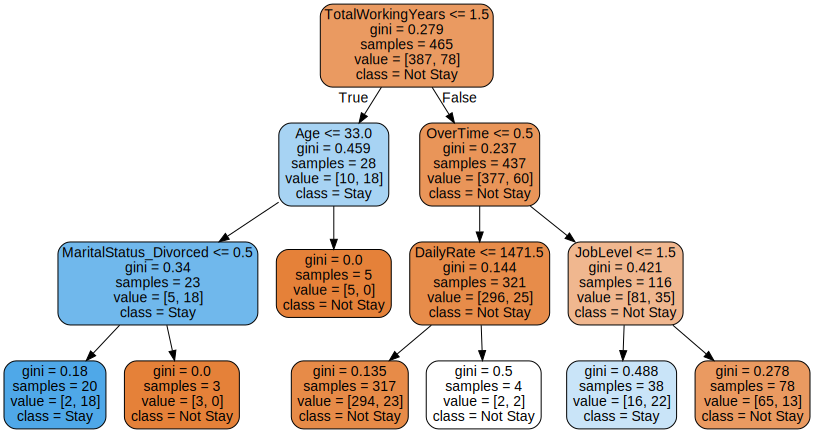

In [200]:
dot_data = export_graphviz(classifier_DT, feature_names = trainX.columns, 
                           filled = True, 
                           rounded = True, 
                           class_names=["Not Stay","Stay"])
graph = gp.Source(dot_data)
graph

In [201]:
dt_pred_prob = classifier_DT.predict_proba(testX)[:,1] # probabilities
metrics.roc_auc_score(testY, dt_pred_prob)

0.7026153846153846

In [223]:
dt_test_pred = np.where(dt_pred_prob > 0.5, 1, 0)
metrics.confusion_matrix(testY, dt_test_pred)

array([[239,  21],
       [ 30,  20]])

In [224]:
# Apply the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10)

# Define the CART Model
dtCV = DecisionTreeClassifier(max_leaf_nodes = 10, #set the parameters
                                       max_depth=3,random_state=0 )

# Define the evaluation metric 
scoring = 'roc_auc'

# Train the CART Model  on the 10-Fold Cross Validation
dt_results = model_selection.cross_val_score(rfCV, trainX, trainY.values.ravel(), 
                                             cv=kfold, scoring=scoring)
dt_auc = dt_results.mean()
print("The CART Model AUC: %.3f and the STD is (%.3f)" % (dt_auc, dt_results.std()))

The CART Model AUC: 0.749 and the STD is (0.139)


In [219]:
dt_feature_importances = pd.DataFrame(classifier_DT.feature_importances_,
                                   index = trainX.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
dt_feature_importances = dt_feature_importances.reset_index()


## Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(
    class_weight="balanced"
    )

# Fit the RF Model
rf = rf.fit(trainX, trainY.values.ravel())

In [209]:
rf_pred_prob = rf.predict_proba(testX)[:,1] # probabilities
metrics.roc_auc_score(testY, rf_pred_prob)

0.7684615384615384

In [213]:
rf_validation_pred = np.where(rf_pred_prob > 0.5, 1, 0)
metrics.confusion_matrix(testY, rf_validation_pred)

array([[252,   8],
       [ 44,   6]])

In [214]:
# Apply the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10)

# Define the Random Forest Model Model
rfCV = RandomForestClassifier(
    class_weight="balanced"
    )

# Define the evaluation metric 
scoring = 'roc_auc'

# Train the Random Forest Model Model on the 10-Fold Cross Validation
rf_results = model_selection.cross_val_score(rfCV, trainX, trainY.values.ravel(), cv=kfold, scoring=scoring)
rf_auc = rf_results.mean()
print("The Random Forest Model AUC: %.3f and the STD is (%.3f)" % (rf_auc, rf_results.std()))

The Random Forest Model AUC: 0.753 and the STD is (0.139)


In [220]:
# Get Feature Importances
rf_feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = trainX.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
rf_feature_importances = feature_importances.reset_index()


<AxesSubplot:xlabel='importance', ylabel='index'>

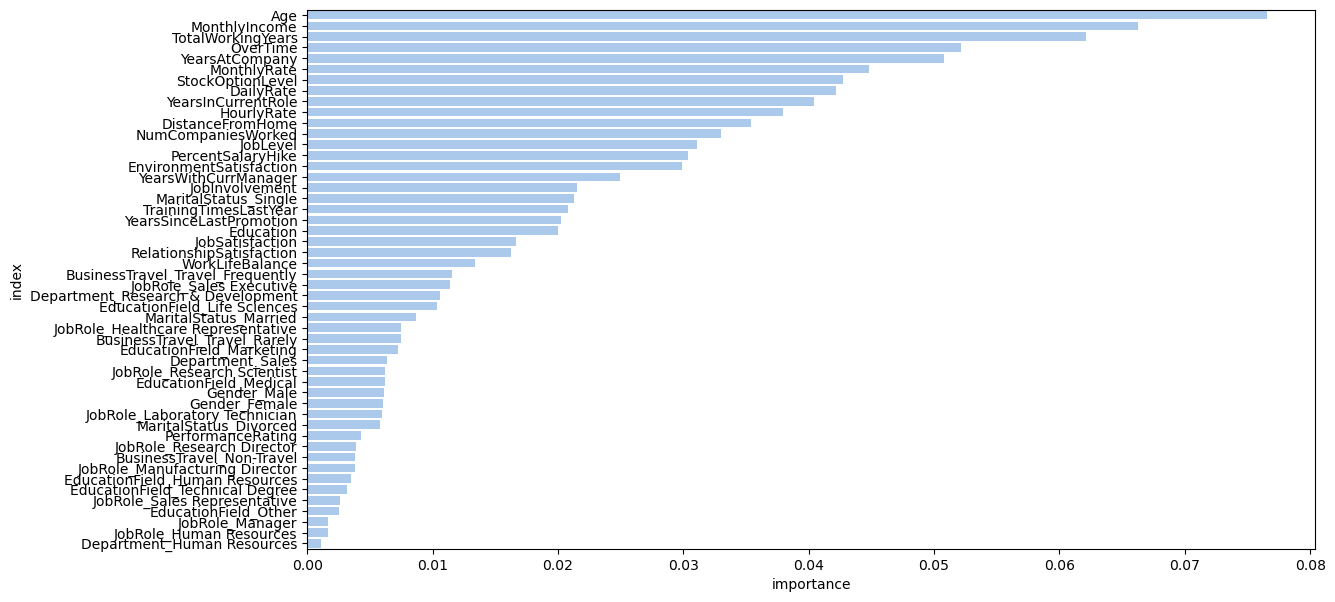

In [177]:
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=rf_feature_importances,
            label="Total", color="b")

## Compare three models

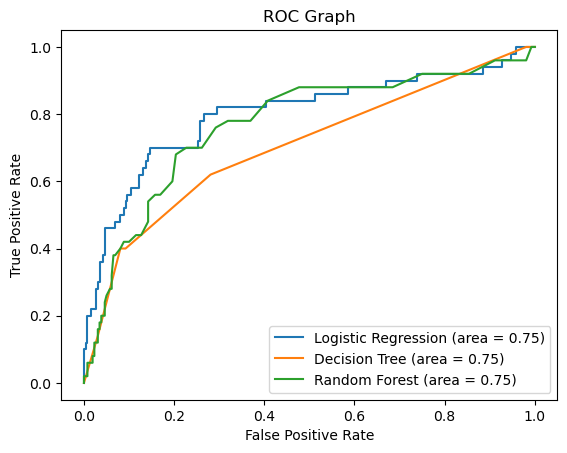

In [222]:
#plot the ROC Curves

#Plot Logistic Regression ROC
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(testY,lr_Y_probs)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Decision Tree ROC
dt_fpr, dt_tpr, thresholds = metrics.roc_curve(testY,dt_pred_prob)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_auc)

# Plot Random Forest ROC
rf_fpr, rf_tpr, rf_thresholds = roc_curve(testY, rf_pred_prob)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.legend(loc="lower right")

plt.show()

According to the ROC Graph, the three models are similar in terms of their auc. The ROC of Random Forest tends to more smooth than other two models.

## Predict the Probability

In [270]:
#Load the data
lyon = pd.read_csv("employee_attrition_lyon.csv")
lyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       386 non-null    float64
 1   BusinessTravel            436 non-null    object 
 2   DailyRate                 427 non-null    float64
 3   Department                441 non-null    object 
 4   DistanceFromHome          387 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    object 
 7   EmployeeCount             441 non-null    int64  
 8   EmployeeNumber            441 non-null    int64  
 9   EnvironmentSatisfaction   441 non-null    int64  
 10  Gender                    441 non-null    object 
 11  HourlyRate                441 non-null    int64  
 12  JobInvolvement            441 non-null    int64  
 13  JobLevel                  441 non-null    int64  
 14  JobRole   

In [271]:
#Drop the non-sense variable
lyon = lyon.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'])

In [272]:
lyon.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,4,Male,84,...,3,4,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,4,Female,57,...,3,3,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,4,Male,58,...,3,3,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,2,Male,59,...,3,3,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,4,Male,62,...,3,4,0,16,3,4,13,11,3,7


In [273]:
#fill the na value in distance, dailyhourrate as the median value
lyon['DistanceFromHome'] = lyon['DistanceFromHome'].fillna(lyon['DistanceFromHome'].median())
lyon['DailyRate'] = lyon['DailyRate'].fillna(lyon['DailyRate'].median())



#fill the na in Age with the totoal working years mins 24, where 24 considered as a normal age that people start to work
lyon['Age'] = lyon['Age'].fillna((lyon['TotalWorkingYears'])-24)

#since some working years are less than 24, we take the absolute value of these to make sure all are positive
lyon['Age'] = lyon['Age'].abs()




In [274]:
# fill the na of BusinessTravel, MaritalStatus as the most frenquent one

lyon['BusinessTravel'] = lyon['BusinessTravel'].fillna('Travel_Rarely')

lyon['MaritalStatus'] = lyon['MaritalStatus'].fillna('Married')




In [275]:
lyon.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [276]:
# Transfer Category variables to dummy variables
lyon_cata_result = pd.DataFrame()
for i in lyon.columns:
    if lyon[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(lyon[i],prefix=i)
        lyon_cata_result = pd.concat([lyon_cata_result,cata],axis=1)
#Delete the original Category variables      
for i in lyon.columns:
    if lyon[i].dtype == 'O':
        lyon = lyon.drop(i,axis=1)

#Merge data together
lyon = pd.concat([lyon,lyon_cata_result],axis=1)

In [277]:
lyon.rename(columns={'OverTime_Yes':'OverTime'},inplace=True)

In [278]:
lyon.drop(columns=['OverTime_No'],inplace=True)

In [281]:

# probabilities prediction by three models
lr_lyon_pred = logm.predict_proba(lyon)
dt_lyon_pred = classifier_DT.predict(lyon)
rf_lyon_pred = rf.predict_proba(lyon) 


In [289]:
#create a dataframe to combine thing toghther
probabilitylt = pd.DataFrame(lr_lyon_pred,
                           columns=['Pro_stay_lr','Pro_leave_lr'])
probabilitydt = pd.DataFrame(dt_lyon_pred,
                           columns=['Attrition_cart'])
probabilityrf = pd.DataFrame(rf_lyon_pred,
                           columns=['Pro_stay_rf','Pro_leave_rf'])

In [292]:
#Combine together
pdList = [probabilitylt, probabilitydt,probabilityrf]
prediction = pd.concat(pdList, axis=1)

In [293]:
prediction

,Pro_stay_lr,Pro_leave_lr,Attrition_cart,Pro_stay_rf,Pro_leave_rf
0,0.746046,0.253954,0,0.83,0.17
1,0.963479,0.036521,0,0.90,0.10
2,0.608300,0.391700,1,0.47,0.53
3,0.969910,0.030090,0,0.91,0.09
4,0.952256,0.047744,0,0.97,0.03
...,...,...,...,...,...
436,0.877215,0.122785,0,0.92,0.08
437,0.796828,0.203172,0,0.88,0.12
438,0.328598,0.671402,1,0.62,0.38
439,0.958811,0.041189,0,0.86,0.14
